# Practice Session 05: Network models


Author: <font color="blue">Rubén Vera Martínez</font>

E-mail: <font color="blue">ruben.vera01@estudiant.upf.edu</font>

Date: <font color="blue">02/11/2021</font>

# 1. Random (ER) graph generator

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [ ]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

In [ ]:
def generate_random_graph(N, p):
    g = nx.Graph()#Se crea un grafo vacio
    for i in range(N):
        g.add_node(i)#Se añaden los N nodos
    for j in range(N):
        for k in range(N):
            if(flip_coin(p) and j < k ):
                g.add_edge(j, k)#Con probabilidad P para cada par de nodos se añadera un enlace
    return g


In [ ]:
def is_connected(g):#Para que sea conectado tenfremos que poder llegar desde un nodo a cualquier otro
    counter = 0
    for j in range(g.number_of_nodes()):
        if(nx.has_path(g, 0,j) and j != 0):#si tenemos camino desde 0 a cualquier nodo, desde cualquier nodo podremos llegar a 0 y en 0 ya sabemos que podemos llegar a cualquier nodo
                counter += 1
    if(counter == g.number_of_nodes()-1):
        return True
    return False

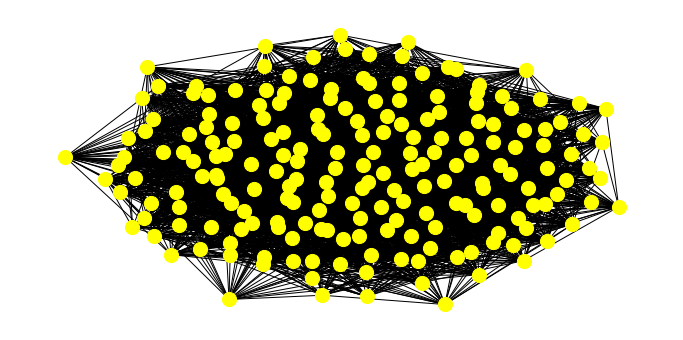

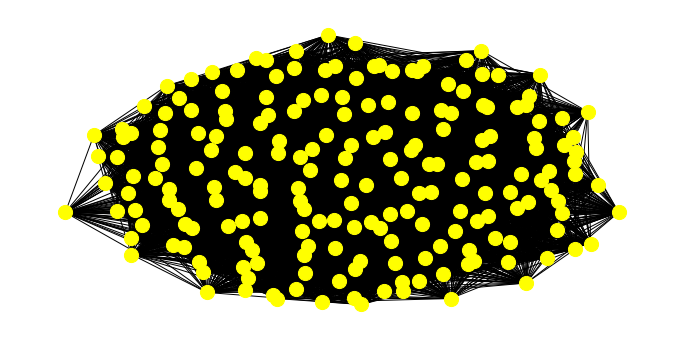

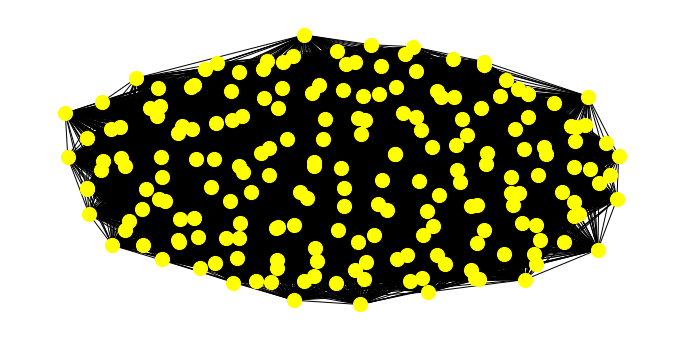

In [ ]:
g1 = generate_random_graph(200, 0.2)
if(is_connected(g1)):#Comprobamos si el grafo generado está conectado o no 
  plt.figure(figsize=(12,6))
  plt.axis('off')
  pos=nx.spring_layout(g1)
  nx.draw_networkx(g1, pos, with_labels=False, node_size=200, node_color='yellow')
g2 = generate_random_graph(200, 0.4)

if(is_connected(g2)):
  plt.figure(figsize=(12,6))
  plt.axis('off')
  pos=nx.spring_layout(g2)
  nx.draw_networkx(g2, pos, with_labels=False, node_size=200, node_color='yellow')

g3 = generate_random_graph(200, 0.6)

if(is_connected(g3)):
  plt.figure(figsize=(12,6))
  plt.axis('off')
  pos=nx.spring_layout(g3)
  nx.draw_networkx(g3, pos, with_labels=False, node_size=200, node_color='yellow')



In [ ]:
def print_er_statistics(g,p):
  N = g.number_of_nodes()
  degree = 0
  for i in range(N):
    degree += g.degree(i)#Sumamos el grado de todos los nodos 
  degree_no_formula = degree/N#Calculamos el degree medio observado
  n_of_links_no_formula = degree/2#Calculamos el numero de enlaces observado

  degree_formula = p*(N-1)#Calculamos el degree medio esperado
  n_of_links_formula = p*(N*(N-1)/2)#Calculamos el nume enlaces medio
  print('average degree observed: ',degree_no_formula) 
  print('average degree expected: ', degree_formula)
  print('n_of_links observed: ', n_of_links_no_formula)
  print('n_of_links expected: ', n_of_links_formula)


In [ ]:
# Leave as-is or modify if you want

def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(8,4))
    plt.loglog(bin_edges[:-1], prob, 'x-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()

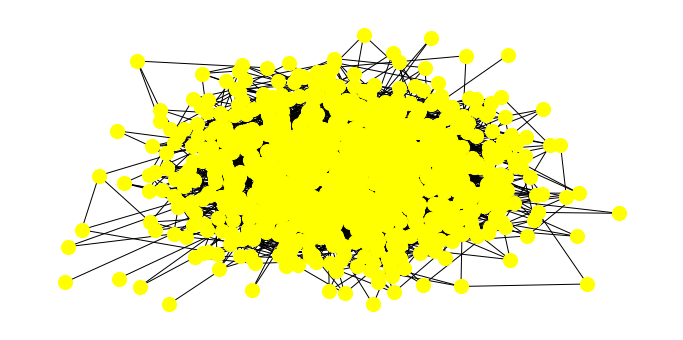

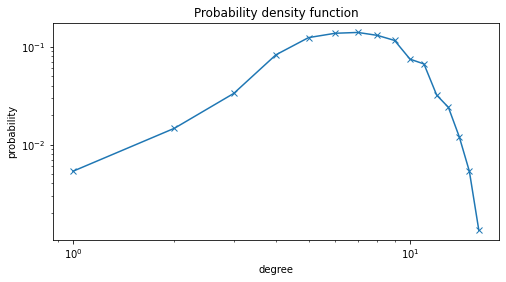

average degree observed:  7.424
average degree expected:  7.49
n_of_links observed:  2784.0
n_of_links expected:  2808.75


In [ ]:
g1 = generate_random_graph(750, 0.01)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g1)
nx.draw_networkx(g1, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g1)
print_er_statistics(g1, 0.01)


En este caso observamos como el grafo generado tiene probabilidad muy baja de conectar sus enlaces por lo que se ven relativamente pocos enlaces teniendo en cuenta que hay 750 nodos, en cuanto a las estadisticas vemos que el average degree y el numero de enlaces observado y esperado es bastante parejo por lo que parece estar bien ejecutado el grafo.
En cuanto al gráfico, vemos como decae rapidamente pero la probabilidad para los grados centrales es bastante similar por lo que forma una curva claramente concava

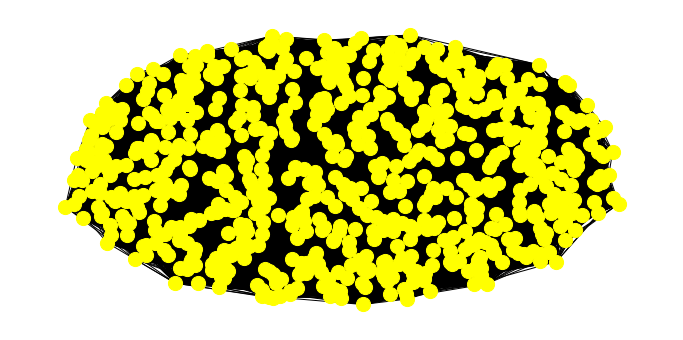

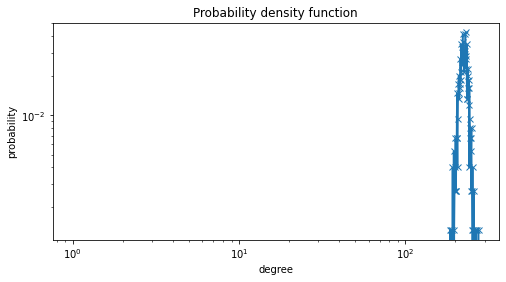

average degree observed:  224.90666666666667
average degree expected:  224.7
n_of_links observed:  84340.0
n_of_links expected:  84262.5


In [ ]:
g2 = generate_random_graph(750, 0.3)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g2)
nx.draw_networkx(g2, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g2)
print_er_statistics(g2, 0.3)


En este caso observamos como el grafo generado tiene probabilidad 0.3, la cual es relativamente baja y aún asi con mucha dificultad se puede observar algun enlace de la gran cantidad que tiene, en cuanto a las estadisticas vemos que el average degree y el numero de enlaces observado y esperado es bastante parejo por lo que parece estar bien ejecutado el grafo. En cuanto al gráfico, vemos que la mayoria de los nodos tienen el mismo grado ya que todos los nodos estan comprimidos entre un intervalo corto de grados con también una curva concava.

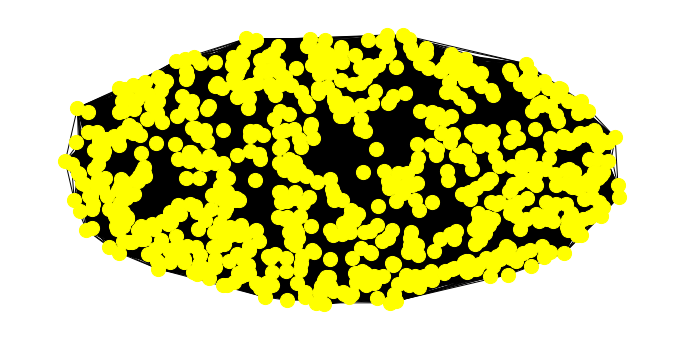

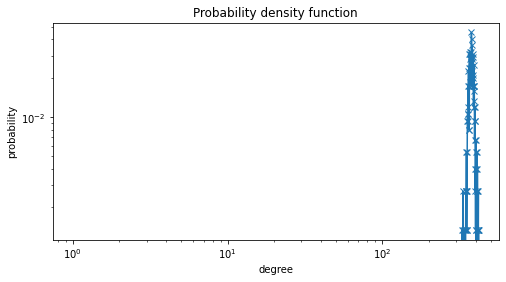

average degree observed:  376.01866666666666
average degree expected:  374.5
n_of_links observed:  141007.0
n_of_links expected:  140437.5


In [ ]:
g3 = generate_random_graph(750, 0.5)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g3)
nx.draw_networkx(g3, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g3)
print_er_statistics(g3, 0.5)


En este caso observamos como el grafo generado tiene probabilidad 0.5, por lo cual pasa lo mismo que en el anterior caso, es complicado de ver algun enlace, en cuanto a las estadisticas vemos que el average degree y el numero de enlaces observado y esperado es bastante parejo por lo que parece estar bien ejecutado el grafo. En cuanto al gráfico, vemos también uno muy similar al anterior, todos los nodos comprimidos en un intervalo corto de grados y con una curva concava


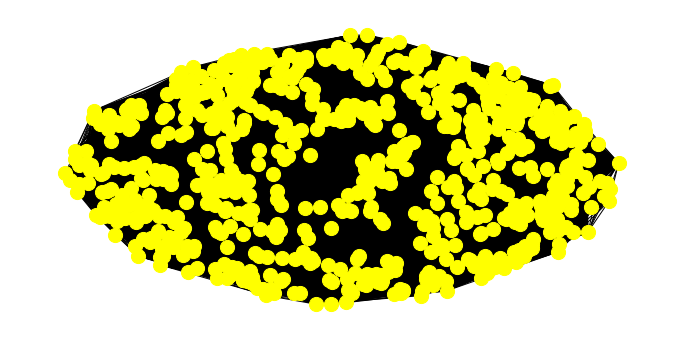

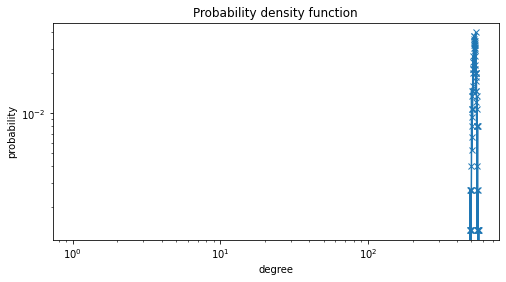

average degree observed:  525.0933333333334
average degree expected:  524.3
n_of_links observed:  196910.0
n_of_links expected:  196612.5


In [ ]:
g4 = generate_random_graph(750, 0.7)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g4)
nx.draw_networkx(g4, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g4)
print_er_statistics(g4, 0.7)


En este caso observamos como el grafo generado tiene probabilidad 0.7, por lo cual pasa lo mismo que en el anterior caso, es complicado de ver algun enlace, en cuanto a las estadisticas vemos que el average degree y el numero de enlaces observado y esperado es bastante parejo por lo que parece estar bien ejecutado el grafo. En cuanto al gráfico, vemos también uno muy similar al anterior, todos los nodos comprimidos en un intervalo corto de grados, en este caso se ve que el intervalo es aún más corto que en los casos anteriores y mantiene la forma de la curva concava


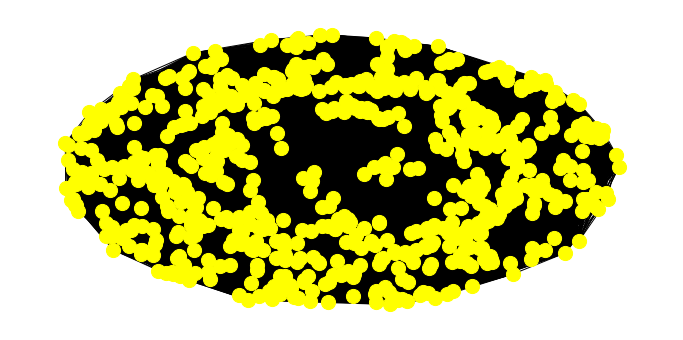

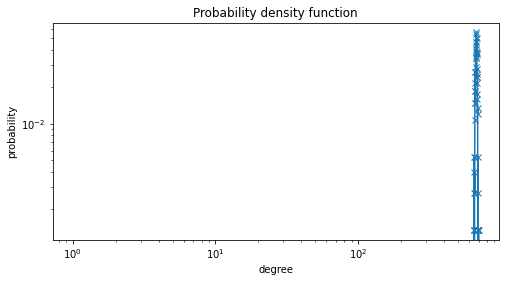

average degree observed:  674.3146666666667
average degree expected:  674.1
n_of_links observed:  252868.0
n_of_links expected:  252787.5


In [ ]:
g5 = generate_random_graph(750, 0.9)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g5)
nx.draw_networkx(g5, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g5)
print_er_statistics(g5, 0.9)

Finalmente, en este caso observamos como el grafo generado tiene probabilidad 0.9, por lo cual pasa lo mismo que en el anterior caso, es prácticamente imposible de ver algun enlace, la mayoria de nodos estan conectados entre ellos. En cuanto a las estadisticas vemos que el average degree y el numero de enlaces observado y esperado es bastante parejo por lo que parece estar bien ejecutado el grafo. EN este caso, el gráfico se puede observar minimamente la forma concava pero parecen mas dos rectas dada su alta pendiente, el intervalo comentado anteriormente es minimo en este caso.

# 2. Preferential attachment (BA) generator

In [ ]:
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    #COMPUTE SUM OF DEGREE OF NODES
    for i in range(N):
      sum_degree += g.degree(i)
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():#Probabilidad de obtener el nodo u
      prob = g.degree(node)/sum_degree#ki/kTotal
      probabilities.append(prob)
      

    # Sample without replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected

In [ ]:
def generate_preferential_attachment_graph(N, m0, m):
  if (m > m0):#comprobamos que m0 sea menor o igual a m
    return ValueError
  g = nx.Graph()#Creamos un grafo vacio
  for i in range(m0-1):
    g.add_node(i)#Añadimos m0-1 nodos
  i = 0
  j = 1
  while i < m0-1:
    g.add_edge(i,j)#creamos enlaces formando un ciclo desde 0 hasta m0-1
    i+=1
    j+=1
  g.add_edge(m0-1,0)#Creamos el ultimo enlace de m0-1 a 0

  for i in range(m0, N-1):
    target = select_targets(g, m)#Seleccionamos el target el cual luego añadiremos un nodo y un enlace desde este nodo i hasta todos los demas nodos j
    g.add_node(i)
    for j in target:
      g.add_edge(i, j)
  return g

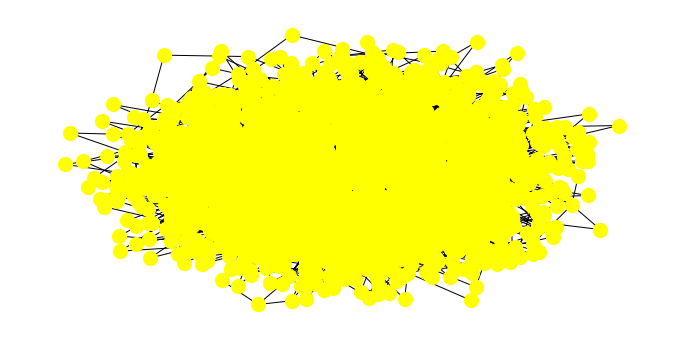

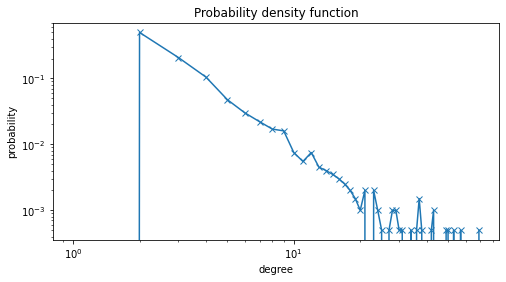

In [ ]:
g1 = generate_preferential_attachment_graph(2000, 8,2)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g1)
nx.draw_networkx(g1, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g1)

En este grafo, el cual es de escala libre, sabemos de teoria que los nodos nuevos que se generen tienden a conectarse a los nodos con mayor grado, por lo que deducimos que los nodos que en el gráfico nos dicen que són de mayor grado son aquellos que se han generado primeros. El gráfico resultante es el esperado también habiendo visto en teoria un ejemplo igual de grafo de preferential attachment, observamos que el grado máximo del grafo es un numero relativamente pequeño y también se ve como se forma esta recta descendiente que esperabamos por el tipo de grafo.

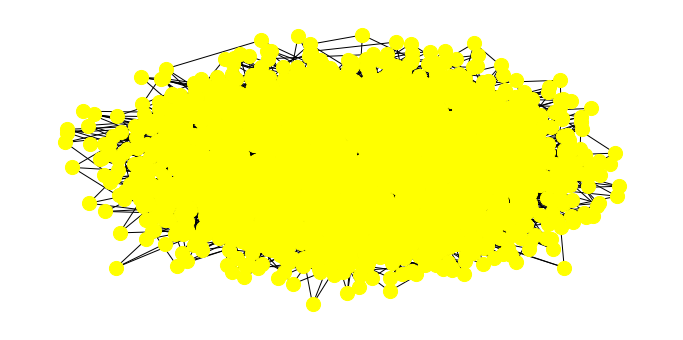

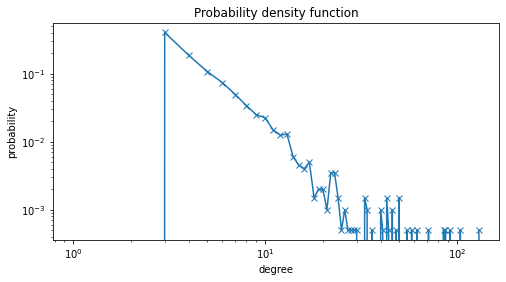

In [ ]:
g2 = generate_preferential_attachment_graph(2000, 5,3)
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g2)
nx.draw_networkx(g2, pos, with_labels=False, node_size=200, node_color='yellow')
plot_degree_distribution(g2)

El gráfico resultante es parecido al anterior pero con diferentes valores a causa de la diferencia entre m0 y m, observamos que el grado máximo del grafo es mayor al grafo anterior y también se ve como se forma esa recta descendiente que esperabamos por el tipo de grafo.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>